#**Funciones**

In [177]:
from math import exp
from matplotlib import *

###**Curvas T1 y T2**

In [178]:
def mz(T1):
    MZ=[]
    for t in range(5000):
        mZ=100*(1-exp(-t/T1))
        MZ.append(mZ)
    return MZ

def mxy(T2):
    MXY=[]
    for t in range(5000):
        mXY=100*exp(-t/T2)
        MXY.append(mXY)
    return MXY

###**Curvas TR Y TE**

In [179]:
def Tiempo_repeticion(TR,T1):
    MZ=[]
    for t in range(TR):
        mZ=100*(1-exp(-t/T1))
        MZ.append(mZ)
    return MZ

def Tiempo_eco(TE,T2):
    MXY=[]
    for t in range(TE):
        mXY=100*exp(-t/T2)
        MXY.append(mXY)
    return MXY

###**Potenciacion**

In [180]:
def Tiempo_eco_POP(MZ,TE,T2):
    MXY=[]
    for t in range(TE):
        mXY=MZ*exp(-t/T2)
        MXY.append(mXY)
    return MXY

def Tiempo_eco_continuo(MZ,TE,T2):
    MXY=[]
    rango = TE + 100
    for t in range(rango):
        mXY=MZ*exp(-t/T2)
        MXY.append(mXY)
    return MXY

###**Valores T1 y T2 de los tejidos en 1,5T y 3 T**

In [181]:
#Valores t1 en 1,5 y 3 T.
Valores_t1 = {"Grasa" : [290,360],
              "Musculo" : [870,1420],
                  "Sust. Blanca" : [790,1100],
                  "Sust. Gris" : [920,1600],
                  "LCR" : [2650,3800],
                  "Higado": [500,800],
              "cartilago": [1060,1240],
              "Sangre" :[1400,1900]}

#Valores t2 en 1,5 y 3 T.
Valores_t2 = {"Grasa" : [160,130],
              "Musculo" : [60,30],
                  "Sust. Blanca" : [90,60],
                  "Sust. Gris" : [100,80],
                  "LCR" : [2500,2300],
                  "Higado": [50,40],
              "cartilago": [42,37],
              "Sangre" :[290,275]}

Localizacion_Valores= {"0":"Grasa",
                          "1":"Musculo",
                          "2":"Sust. Blanca",
                          "3":"Sust. Gris",
                          "4":"LCR",
                          "5":"Higado",
                          "6":"cartilago",
                          "7":"Sangre"}

##**Graficos**

###**Curvas t1 y t2 valores libres**

In [182]:
def curva_t1_libre():
  T1_A = int(input("ingrese el T1 en ms , del tejido A: "))
  T1_B = int(input("ingrese el T1 en ms , del tejido B: "))
  mz_t1_A = mz(T1_A)
  mz_t1_B = mz(T1_B)

  pyplot.plot(mz_t1_A, label="Tejido_A")
  pyplot.plot(mz_t1_B, label="Tejido_B")
  pyplot.hlines(y=63, xmin=0, xmax=T1_A, linewidth=1, color="r", linestyle=':')
  pyplot.hlines(y=63, xmin=0, xmax=T1_B, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T1_A, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T1_B, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  if T1_A > T1_B:
    xlm = T1_A
  elif T1_A < T1_B:
    xlm = T1_B
  # Limitar los valores de los ejes.

  pyplot.xlim(0, (xlm + 2000))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMZ')
  pyplot.xlabel('tiempo en ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T1" )
  pyplot.legend(loc=4)
  
  pyplot.text(T1_A,63,"63%")
  pyplot.text(T1_B,63,"63%")

  # Mostrarlo.
  pyplot.show()

def curva_t2_libre():
  T2_A = int(input("ingrese el T2 en ms , del tejido A: "))
  T2_B = int(input("ingrese el T2 en ms , del tejido B: "))

  pyplot.plot(mxy(T2_A), label="Tejido_A")
  pyplot.plot(mxy(T2_B), label="Tejido_B")
  pyplot.hlines(y=37, xmin=0, xmax=T2_A, linewidth=1, color="r", linestyle=':')
  pyplot.hlines(y=37, xmin=0, xmax=T2_B, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T2_A, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T2_B, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.
  if T2_A > T2_B:
    xlm = T2_A
  elif T2_A < T2_B:
    xlm = T2_B

  pyplot.xlim(0, (xlm + 100))
  pyplot.ylim(0, 100)

  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMXY')
  pyplot.xlabel('tiempo en ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T2")
  pyplot.legend(loc=1)
  
  pyplot.text(T2_A,37,"37%")
  pyplot.text(T2_B,37,"37%")

  # Mostrarlo.
  pyplot.show()


###**Curvas t1 y t2 segun tejido**

In [183]:
def curva_t1_tejido():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]


  pyplot.plot(mz(T1_A), label=Localizacion_Valores[tejido_escogido_A])
  pyplot.plot(mz(T1_B), label=Localizacion_Valores[tejido_escogido_B])
  pyplot.hlines(y=63, xmin=0, xmax=T1_A, linewidth=1, color="r", linestyle=':')
  pyplot.hlines(y=63, xmin=0, xmax=T1_B, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T1_A, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T1_B, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  if T1_A > T1_B:
    xlm = T1_A
  elif T1_A < T1_B:
    xlm = T1_B
  # Limitar los valores de los ejes.

  pyplot.xlim(0, (xlm+2000))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMZ')
  pyplot.xlabel('tiempo en ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T1, comparacion de tejidos"  )
  pyplot.legend(loc=4)
  
  pyplot.text(T1_A,63,"63%")
  pyplot.text(T1_B,63,"63%")

  # Mostrarlo.
  pyplot.show()

def curva_t2_tejido():
  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]

  pyplot.plot(mxy(T2_A), label=Localizacion_Valores[tejido_escogido_A])
  pyplot.plot(mxy(T2_B), label=Localizacion_Valores[tejido_escogido_B])
  pyplot.hlines(y=37, xmin=0, xmax=T2_A, linewidth=1, color="r", linestyle=':')
  pyplot.hlines(y=37, xmin=0, xmax=T2_B, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T2_A, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T2_B, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  if T2_A > T2_B:
    xlm = T2_A
  elif T2_A < T2_B:
    xlm = T2_B

  pyplot.xlim(0, (xlm + 100))
  pyplot.ylim(0, 100)

  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMXY')
  pyplot.xlabel('ttiempo en ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T2, comparacion de tejidos" )
  pyplot.legend(loc=1)
  
  pyplot.text(T2_A,37,"37%")
  pyplot.text(T2_B,37,"37%")

  # Mostrarlo.
  pyplot.show()


###**Curvas T1 y T2 segun Tejido, en 1,5T y 3T**

In [184]:
def curva_t1_tesjale():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido]][1]


  pyplot.plot(mz(T1_A), label="1,5 T")
  pyplot.plot(mz(T1_B), label="3 T")
  pyplot.hlines(y=63, xmin=0, xmax=T1_A, linewidth=1, color="r", linestyle=':')
  pyplot.hlines(y=63, xmin=0, xmax=T1_B, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T1_A, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T1_B, ymin=0, ymax=63, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  if T1_A > T1_B:
    xlm = T1_A
  elif T1_A < T1_B:
    xlm = T1_B
  # Limitar los valores de los ejes.

  pyplot.xlim(0, (xlm+1000))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMZ')
  pyplot.xlabel('tiempo en ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T1, comparacion entre 1,5 T y 3 T")
  pyplot.legend(loc=4)
  
  pyplot.text(T1_A,63,"63%")
  pyplot.text(T1_B,63,"63%")

  # Mostrarlo.
  pyplot.show()

def curva_t2_tesjale():
  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido]][1]

  pyplot.plot(mxy(T2_A), label="1,5 T")
  pyplot.plot(mxy(T2_B), label="3 T")
  pyplot.hlines(y=37, xmin=0, xmax=T2_A, linewidth=1, color="r", linestyle=':')
  pyplot.hlines(y=37, xmin=0, xmax=T2_B, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T2_A, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  pyplot.vlines(x=T2_B, ymin=0, ymax=37, linewidth=1, color="r",linestyle=':')
  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  if T2_A > T2_B:
    xlm = T2_A
  elif T2_A < T2_B:
    xlm = T2_B

  pyplot.xlim(0, (xlm + 100))
  pyplot.ylim(0, 100)

  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMXY')
  pyplot.xlabel('tiempo en ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T2, comparacion entre 1,5 T y 3 T" )
  pyplot.legend(loc=1)
  
  pyplot.text(T2_A,37,"37%")
  pyplot.text(T2_B,37,"37%")

  # Mostrarlo.
  pyplot.show()

###**Curva T1/TR y T2/TE**

In [185]:
def curva_t1_TR():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]
  TR = int(input("ingrese el Tiempo de Repeticion en ms: "))
  tiempo_de_repeticion_A = Tiempo_repeticion(TR,T1_A)
  tiempo_de_repeticion_B = Tiempo_repeticion(TR,T1_B)

  pyplot.plot(mz(T1_A), label=Localizacion_Valores[tejido_escogido_A])
  pyplot.plot(tiempo_de_repeticion_A, 'g',linewidth=2)
  pyplot.hlines(y=tiempo_de_repeticion_A[-1], xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')

  pyplot.plot(mz(T1_B), label=Localizacion_Valores[tejido_escogido_B])
  pyplot.plot(tiempo_de_repeticion_B,'g',linewidth=2)
  pyplot.hlines(y=tiempo_de_repeticion_B[-1], xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')
  pyplot.vlines(x=TR, ymin=0, ymax=100, linewidth=2, color="g",linestyle='-.',label = "TR")

  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  pyplot.xlim(0, (TR + 1000))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMZ')
  pyplot.xlabel('tiempo de repeticion_ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T1 en funcion del Tiempo de Repeticion" )
  pyplot.legend(loc=4)
  pyplot.figure(figsize=(10, 10))

  # Mostrarlo.
  pyplot.show()


def curva_t2_TE():
  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]
  TE = int(input("ingrese el Tiempo de Eco en ms: "))
  Tiempo_de_eco_A = Tiempo_eco(TE,T2_A)
  Tiempo_de_eco_B = Tiempo_eco(TE,T2_B)


  pyplot.plot(mxy(T2_A), label=Localizacion_Valores[tejido_escogido_A])
  pyplot.plot(Tiempo_de_eco_A, 'g',linewidth=2)
  pyplot.hlines(y=Tiempo_de_eco_A[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')


  pyplot.plot(mxy(T2_B), label=Localizacion_Valores[tejido_escogido_B])
  pyplot.plot(Tiempo_de_eco_B,'g',linewidth=2)
  pyplot.hlines(y=Tiempo_de_eco_B[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')
  pyplot.vlines(x=TE, ymin=0, ymax=100, linewidth=2, color="g",linestyle='-.',label = "TE")

  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  pyplot.xlim(0, (TE + 300))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMXY')
  pyplot.xlabel('tiempo de eco_ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T2 en funcion del Tiempo del tiempò de eco" )
  pyplot.legend(loc=1)


  # Mostrarlo.
  pyplot.show()

In [186]:
def curva_TR_TE():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]
  TR = int(input("ingrese el Tiempo de Repeticion en ms: "))
  TE = int(input("ingrese el Tiempo de Eco en ms: "))
  tiempo_de_repeticion_A = Tiempo_repeticion(TR,T1_A)
  tiempo_de_repeticion_B = Tiempo_repeticion(TR,T1_B)
  
  Ultimo_valor_A = tiempo_de_repeticion_A[-1]
  Ultimo_valor_B = tiempo_de_repeticion_B[-1]

  pyplot.plot(mz(T1_A), 'k',linewidth=1, linestyle=':')
  pyplot.plot(tiempo_de_repeticion_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  pyplot.hlines(y=Ultimo_valor_A, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')

  pyplot.plot(mz(T1_B), 'k',linewidth=1, linestyle=':')
  pyplot.plot(tiempo_de_repeticion_B,linewidth=2,label=Localizacion_Valores[tejido_escogido_B])
  pyplot.hlines(y=Ultimo_valor_B, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')
  pyplot.vlines(x=TR, ymin=0, ymax=100, linewidth=2, color="k",label = "TR")

  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  pyplot.xlim(0, (TR + 200))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMZ')
  pyplot.xlabel('tiempo de repeticion_ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T1 en funcion del Tiempo de Repeticion" )
  pyplot.text(TR,90,"& vMXY")
  pyplot.legend(loc=4)
  pyplot.figure(figsize=(10, 10))

  # Mostrarlo.
  pyplot.show()

  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]
  Tiempo_de_eco_A = Tiempo_eco_POP(Ultimo_valor_A,TE,T2_A)
  Tiempo_de_eco_B = Tiempo_eco_POP(Ultimo_valor_B,TE,T2_B)
  Tiempo_eco_continuo_A = Tiempo_eco_continuo(Ultimo_valor_A,TE,T2_A)
  Tiempo_eco_continuo_B = Tiempo_eco_continuo(Ultimo_valor_B,TE,T2_B)


  pyplot.plot(Tiempo_eco_continuo_A, 'k',linewidth=1, linestyle=':')
  pyplot.plot(Tiempo_de_eco_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  pyplot.hlines(y=Tiempo_de_eco_A[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')


  pyplot.plot(Tiempo_eco_continuo_B, 'k',linewidth=1, linestyle=':')
  pyplot.plot(Tiempo_de_eco_B,linewidth=2, label=Localizacion_Valores[tejido_escogido_B])
  pyplot.hlines(y=Tiempo_de_eco_B[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')
  pyplot.vlines(x=TE, ymin=0, ymax=100, linewidth=2, color="k",label = "TE")

  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  pyplot.xlim(0, (TE + 50))
  if Ultimo_valor_A > Ultimo_valor_B:
    xlm = Ultimo_valor_A
  elif Ultimo_valor_A < Ultimo_valor_B:
    xlm = Ultimo_valor_A
  # Limitar los valores de los ejes.

  pyplot.ylim(0, (xlm + 10))
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMXY')
  pyplot.xlabel('tiempo de eco_ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T2 en funcion del Tiempo del tiempò de eco" )
  pyplot.legend(loc=1)


  # Mostrarlo.
  pyplot.show()
  

###**Potenciacion**

In [218]:
def curva_TR_TE():
  T1_A = Valores_t1[Localizacion_Valores[tejido_escogido_A]][0]
  T1_B = Valores_t1[Localizacion_Valores[tejido_escogido_B]][0]
  TR = int(input("ingrese el Tiempo de Repeticion en ms: "))
  TE = int(input("ingrese el Tiempo de Eco en ms: "))
  tiempo_de_repeticion_A = Tiempo_repeticion(TR,T1_A)
  tiempo_de_repeticion_B = Tiempo_repeticion(TR,T1_B)
  
  Ultimo_valor_A = tiempo_de_repeticion_A[-1]
  Ultimo_valor_B = tiempo_de_repeticion_B[-1]

  pyplot.plot(mz(T1_A), 'k',linewidth=1, linestyle=':')
  pyplot.plot(tiempo_de_repeticion_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  pyplot.hlines(y=Ultimo_valor_A, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')

  pyplot.plot(mz(T1_B), 'k',linewidth=1, linestyle=':')
  pyplot.plot(tiempo_de_repeticion_B,linewidth=2,label=Localizacion_Valores[tejido_escogido_B])
  pyplot.hlines(y=Ultimo_valor_B, xmin=0, xmax=TR, linewidth=1, color="g", linestyle=':')
  pyplot.vlines(x=TR, ymin=0, ymax=100, linewidth=2, color="k",label = "TR")

  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  pyplot.xlim(0, (TR + 200))
  pyplot.ylim(0, 100)
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMZ')
  pyplot.xlabel('tiempo de repeticion_ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T1 en funcion del Tiempo de Repeticion" )
  pyplot.text(TR,90,"& vMXY")
  pyplot.legend(loc=4)
  pyplot.figure(figsize=(10, 10))

  # Mostrarlo.
  pyplot.show()

  T2_A = Valores_t2[Localizacion_Valores[tejido_escogido_A]][0]
  T2_B = Valores_t2[Localizacion_Valores[tejido_escogido_B]][0]
  Tiempo_de_eco_A = Tiempo_eco_POP(Ultimo_valor_A,TE,T2_A)
  Tiempo_de_eco_B = Tiempo_eco_POP(Ultimo_valor_B,TE,T2_B)
  Tiempo_eco_continuo_A = Tiempo_eco_continuo(Ultimo_valor_A,TE,T2_A)
  Tiempo_eco_continuo_B = Tiempo_eco_continuo(Ultimo_valor_B,TE,T2_B)


  pyplot.plot(Tiempo_eco_continuo_A, 'k',linewidth=1, linestyle=':')
  pyplot.plot(Tiempo_de_eco_A,linewidth=2,label=Localizacion_Valores[tejido_escogido_A])
  pyplot.hlines(y=Tiempo_de_eco_A[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')


  pyplot.plot(Tiempo_eco_continuo_B, 'k',linewidth=1, linestyle=':')
  pyplot.plot(Tiempo_de_eco_B,linewidth=2, label=Localizacion_Valores[tejido_escogido_B])
  pyplot.hlines(y=Tiempo_de_eco_B[-1], xmin=0, xmax=TE, linewidth=1, color="g", linestyle=':')
  pyplot.vlines(x=TE, ymin=0, ymax=100, linewidth=2, color="k",label = "TE")

  # Establecer el color de los ejes.

  pyplot.axhline(0, color="black")
  pyplot.axvline(0, color="black")

  # Limitar los valores de los ejes.

  pyplot.xlim(0, (TE + 50))
  if Ultimo_valor_A > Ultimo_valor_B:
    xlm = Ultimo_valor_A
  elif Ultimo_valor_A < Ultimo_valor_B:
    xlm = Ultimo_valor_B

  pyplot.ylim(0, (xlm + 10))
  # Guardar gráfico como imágen PNG.

  pyplot.ylabel('% vMXY')
  pyplot.xlabel('tiempo de eco_ms')

  pyplot.savefig("output.png")
  pyplot.title("curva T2 en funcion del Tiempo del tiempò de eco" )
  pyplot.legend(loc=1)


  # Mostrarlo.
  pyplot.show()

  if Tiempo_de_eco_A[-1] > Tiempo_de_eco_B[-1]:
    print(Localizacion_Valores[tejido_escogido_A],"tiene mas señal que ",Localizacion_Valores[tejido_escogido_B])
    print("La diferencia de señal entre los tejidos es de ", (Tiempo_de_eco_A[-1]-Tiempo_de_eco_B[-1]))
  elif Tiempo_de_eco_A[-1] < Tiempo_de_eco_B[-1]:
    print(Localizacion_Valores[tejido_escogido_B],"tiene mas señal que ",Localizacion_Valores[tejido_escogido_A])
    print("La diferencia de señal entre los tejidos es de ", (Tiempo_de_eco_B[-1]-Tiempo_de_eco_A[-1]))

#**Experimento**

##**Analisis Curvas T1 y T2, con valores libres**

###**Curva T1**

ingrese el T1 en ms , del tejido A: 1000
ingrese el T1 en ms , del tejido B: 2000


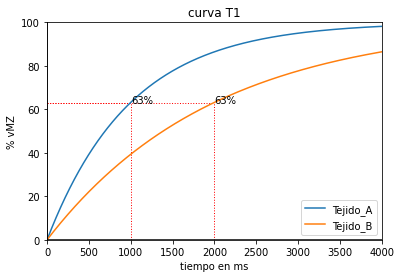

In [188]:
curva_t1_libre()

###**Curva T2**

ingrese el T2 en ms , del tejido A: 20
ingrese el T2 en ms , del tejido B: 40


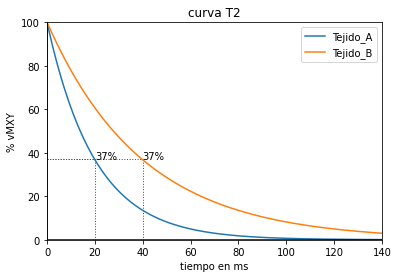

In [189]:
curva_t2_libre()

##**Analisis Curvas T1 y T2 segun Tejido**

In [190]:
print(Localizacion_Valores)
tejido_escogido_A = input("Indique el tejido A a evaluar: ")
tejido_escogido_B = input("Indique el tejido B a evaluar: ")

{'0': 'Grasa', '1': 'Musculo', '2': 'Sust. Blanca', '3': 'Sust. Gris', '4': 'LCR', '5': 'Higado', '6': 'cartilago', '7': 'Sangre'}
Indique el tejido A a evaluar: 0
Indique el tejido B a evaluar: 1


###**Curva T1**

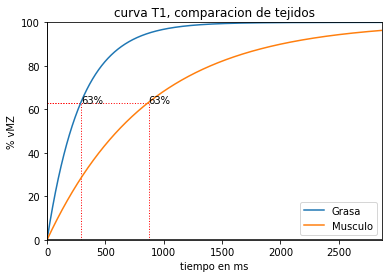

In [191]:
curva_t1_tejido()

###**Curva T2**

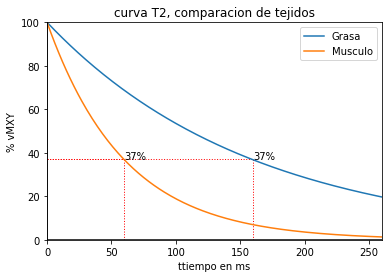

In [192]:
curva_t2_tejido()

##**Analisis Curvas T1 y T2 segun Tejido, en 1,5T y 3T**

{'0': 'Grasa', '1': 'Musculo', '2': 'Sust. Blanca', '3': 'Sust. Gris', '4': 'LCR', '5': 'Higado', '6': 'cartilago', '7': 'Sangre'}
Indique el tejido A a evaluar0


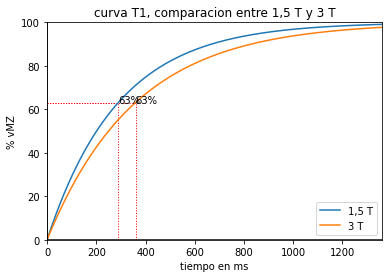

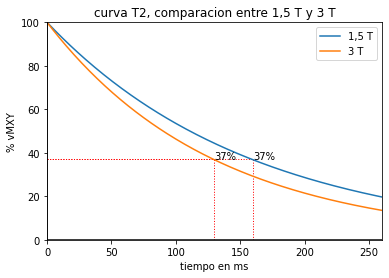

In [193]:
print(Localizacion_Valores)
tejido_escogido = input("Indique el tejido A a evaluar")
curva_t1_tesjale()
curva_t2_tesjale()

##**Analisis Curvas T1 y T2 segun Tejido, segun TR Y TE**

In [194]:
print(Localizacion_Valores)
tejido_escogido_A = input("Indique el tejido A a evaluar: ")
tejido_escogido_B = input("Indique el tejido B a evaluar: ")

{'0': 'Grasa', '1': 'Musculo', '2': 'Sust. Blanca', '3': 'Sust. Gris', '4': 'LCR', '5': 'Higado', '6': 'cartilago', '7': 'Sangre'}
Indique el tejido A a evaluar: 0
Indique el tejido B a evaluar: 1


###**T2_TE**

ingrese el Tiempo de Eco en ms: 20


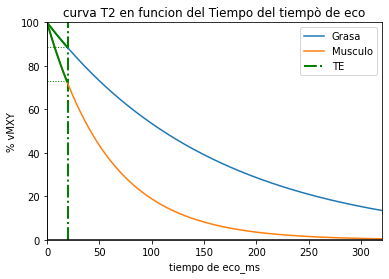

In [195]:
curva_t2_TE()

ingrese el Tiempo de Eco en ms: 120


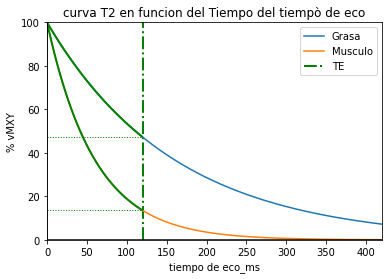

In [196]:
curva_t2_TE()

###**T1_TR**

ingrese el Tiempo de Repeticion en ms: 800


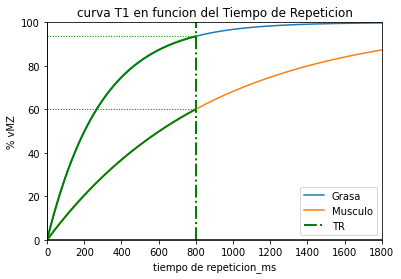

<Figure size 720x720 with 0 Axes>

In [197]:
curva_t1_TR()

ingrese el Tiempo de Repeticion en ms: 3000


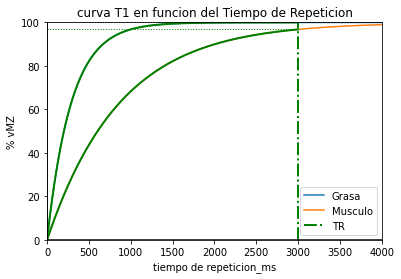

<Figure size 720x720 with 0 Axes>

In [198]:
curva_t1_TR()

##**Potenciacion de imagen**

In [219]:
print(Localizacion_Valores)
tejido_escogido_A = input("Indique el tejido A a evaluar: ")
tejido_escogido_B = input("Indique el tejido B a evaluar: ")

{'0': 'Grasa', '1': 'Musculo', '2': 'Sust. Blanca', '3': 'Sust. Gris', '4': 'LCR', '5': 'Higado', '6': 'cartilago', '7': 'Sangre'}
Indique el tejido A a evaluar: 4
Indique el tejido B a evaluar: 7


###**Potenciacion T1**

ingrese el Tiempo de Repeticion en ms: 500
ingrese el Tiempo de Eco en ms: 150


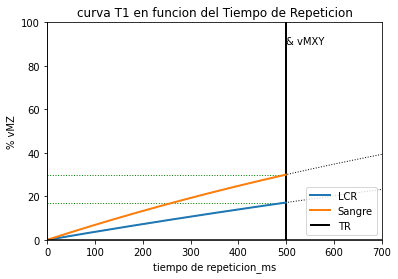

<Figure size 720x720 with 0 Axes>

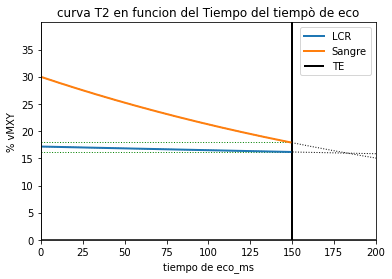

Sangre tiene mas señal que  LCR
La diferencia de señal entre los tejidos es de  1.7658658755033798


In [220]:
curva_TR_TE()

###**Potenciacion T2**

ingrese el Tiempo de Repeticion en ms: 3000
ingrese el Tiempo de Eco en ms: 120


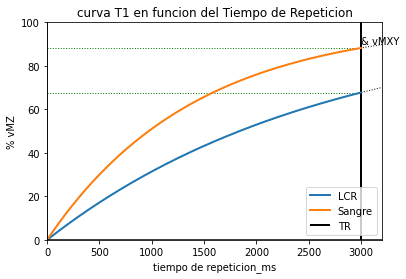

<Figure size 720x720 with 0 Axes>

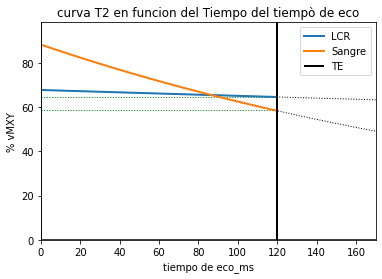

LCR tiene mas señal que  Sangre
La diferencia de señal entre los tejidos es de  6.048684782243072


In [221]:
curva_TR_TE()

###**Potenciacion DP**

ingrese el Tiempo de Repeticion en ms: 2500
ingrese el Tiempo de Eco en ms: 20


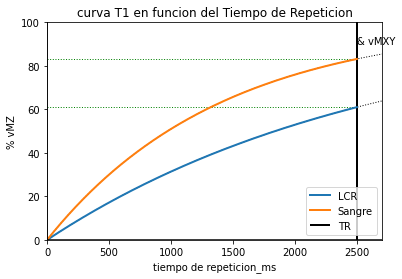

<Figure size 720x720 with 0 Axes>

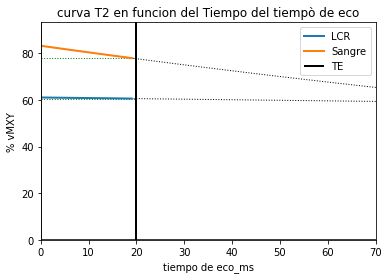

Sangre tiene mas señal que  LCR
La diferencia de señal entre los tejidos es de  17.349998977368465


In [222]:
curva_TR_TE()